# Heart Disease Modelling

Imports and Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the Cleveland dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]
df = pd.read_csv(url, names=columns, na_values='?')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


EDA and Data preprocessing

In [2]:
# Initial exploration
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Handling missing values
# Fill missing values with median
df['ca'].fillna(df['ca'].median(), inplace=True)
df['thal'].fillna(df['thal'].median(), inplace=True)
print(df.isnull().sum())

# Target conversion
# Convert target to binary: 0 (no disease), 1 (disease)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df['num'].value_counts()

# Feature normalization
features = df.drop('num', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
X = pd.DataFrame(features_scaled, columns=features.columns)
y = df['num']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.68976

C:\Users\tusha\AppData\Local\Temp\ipykernel_9668\2203167177.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].median(), inplace=True)
C:\Users\tusha\AppData\Local\Temp\ipykernel_9668\2203167177.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Heart Disease Prediction (Classification)

In [3]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Logistic regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation metrics
def print_metrics(y_true, y_pred, model_name):
    print(f"{model_name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print('-'*30)

print_metrics(y_test, y_pred_logreg, "Logistic Regression")
print_metrics(y_test, y_pred_rf, "Random Forest")

Logistic Regression Results:
Accuracy: 0.8688524590163934
Precision: 0.8125
Recall: 0.9285714285714286
F1-Score: 0.8666666666666667
Confusion Matrix:
 [[27  6]
 [ 2 26]]
------------------------------
Random Forest Results:
Accuracy: 0.9016393442622951
Precision: 0.84375
Recall: 0.9642857142857143
F1-Score: 0.9
Confusion Matrix:
 [[28  5]
 [ 1 27]]
------------------------------


Cholestrol Level Prediction (Regression)

R2 Score: 0.13367645041041698
RMSE: 59.21156398718282


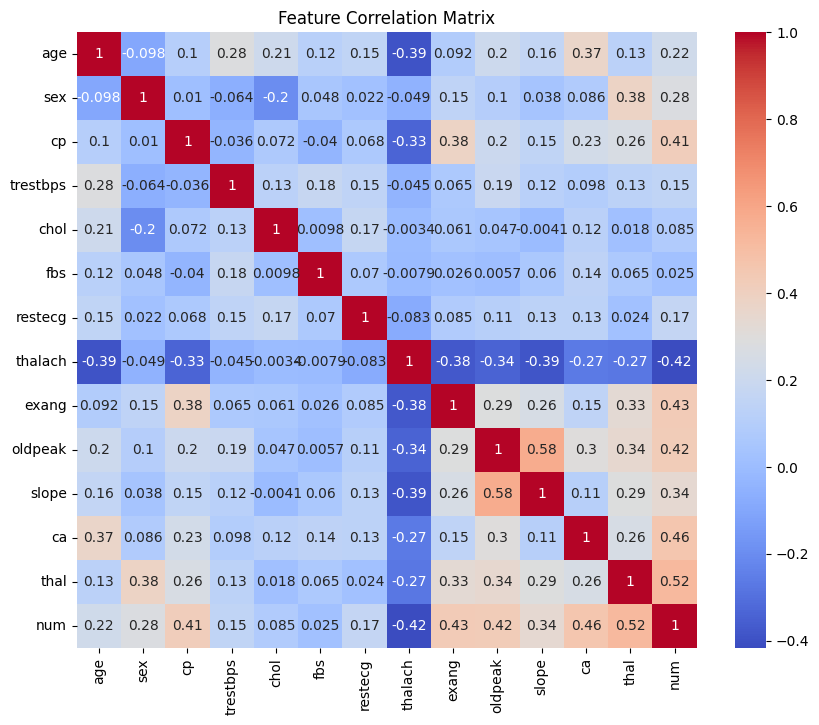

Top features correlated with cholesterol:
 age         0.208950
restecg     0.171043
trestbps    0.130120
Name: chol, dtype: float64


In [4]:
# Prepare data
X_chol = X.drop('chol', axis=1)
y_chol = df['chol']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_chol, y_chol, random_state=42, test_size=0.2)

# Linear regression
linreg = LinearRegression()
linreg.fit(Xc_train, yc_train)
y_pred_chol = linreg.predict(Xc_test)

# Evaluation
from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score:", r2_score(yc_test, y_pred_chol))
print("RMSE:", np.sqrt(mean_squared_error(yc_test, y_pred_chol)))

# Correlation analysis
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

corr_with_chol = corr_matrix['chol'].drop('chol').sort_values(ascending=False)
print("Top features correlated with cholesterol:\n", corr_with_chol.head(3))


Principle Component Analysis (PCA)

Original shape: (303, 13)
Reduced shape: (303, 12)


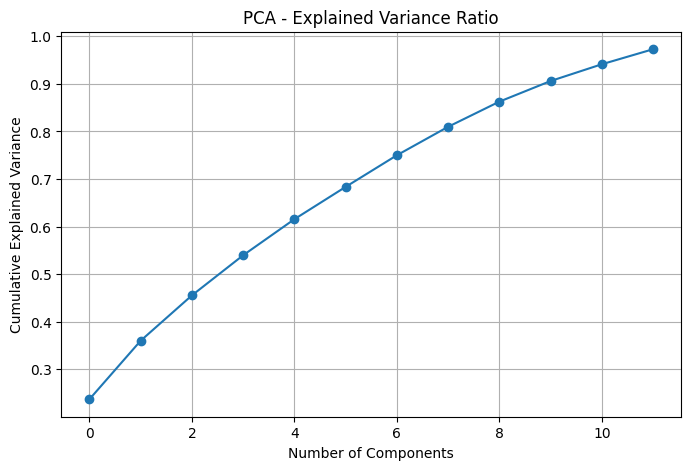

In [5]:
# Apply PCA
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)

# Explained Variance Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance Ratio')
plt.grid()
plt.show()

K-means Clustering on PCA-Reduced Data

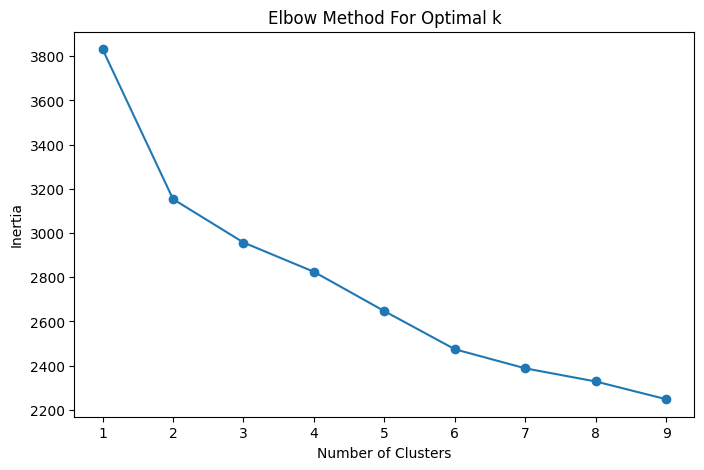

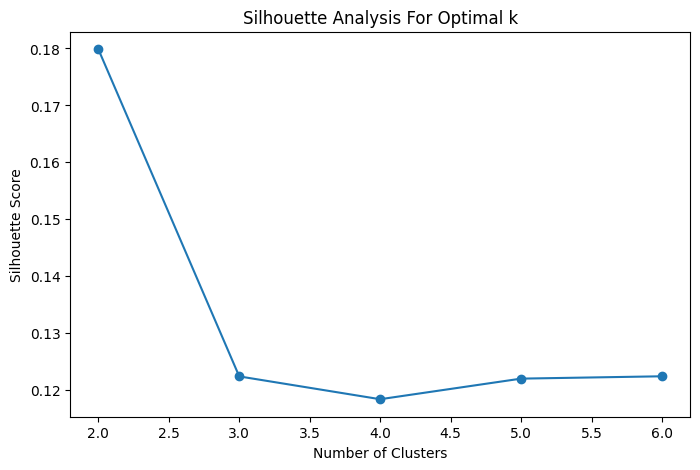

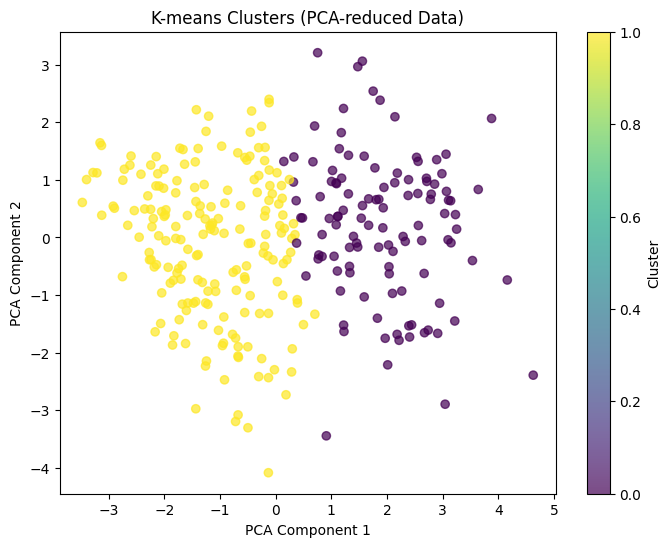

         count      mean
cluster                 
0          114  0.885965
1          189  0.201058


In [6]:
# Elbow method
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette SCore
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    sil_scores.append(silhouette_score(X_pca, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

# Final Clustering and Visualization
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clusters (PCA-reduced Data)')
plt.colorbar(label='Cluster')
plt.show()

# Cluster summary
df['cluster'] = clusters
print(df.groupby('cluster')['num'].agg(['count', 'mean']))

***Conclusion***
- **Random Forest** achieved the highest accuracy for heart disease classification.
- **Exercise-induced parameters** were most informative in PCA.
- **Clustering** revealed two distinct patient groups with different heart disease risks.
- **Cholesterol** prediction showed only moderate correlation with other features, indicating the need for additional biomarkers.
